In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# 필요한 패키지 설치

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('heart_2020_cleaned.csv')
df
## 사용할 컬럼을 정리하자.
df2 = pd.get_dummies(df, columns =['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
                    , drop_first = True)
df2.head()
df2 =df2 * 1
df2
# 숫자형 변수 분리

df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)
#Robust Scaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num) # 스케일링 진행
# 컬럼명 추가

df_num2 = pd.DataFrame(data =df_robust, columns = df_num.columns)
df_num2
df3 = pd.concat([df_num2, df_nom], axis= 1) # 스케일링한 컬럼을 다시 합치기!
# 독립변수와 종속변수 분리 생성

X = df3.drop(['HeartDisease_Yes'],axis =1 )
y = df3[['HeartDisease_Yes']] # 로지스틱회귀를 사용하기 위해 2진분류로 진행
# train,test 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((223856, 37), (95939, 37), (223856, 1), (95939, 1))

<Axes: xlabel='HeartDisease_Yes', ylabel='count'>

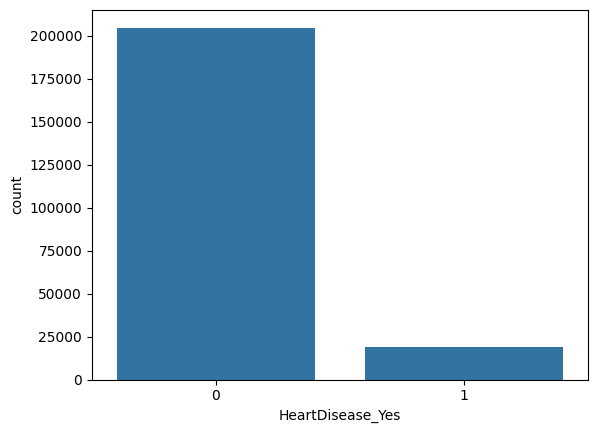

In [19]:
sns.countplot(x='HeartDisease_Yes',data=y_train) # 대부분의 값들이 0의 경우가 많은 케이스

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support


In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
precision, recall, f1score, support = precision_recall_fscore_support(y_test, y_pred)

c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(precision[0] , recall[0] , f1score[0] )

0.9221972571380121 0.9916237407120391 0.955651228432417


In [23]:
from sklearn.model_selection import cross_val_score

f1_scores = cross_val_score(model,X_train, y_train, scoring = 'f1', cv=5)
f1_scores2 = cross_val_score(model,X_test, y_test, scoring = 'f1', cv=5)

c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [24]:
print('평균 f1 정확도 : ',np.mean(f1_scores))
print('test 평균 f1 정확도 : ',np.mean(f1_scores2))

평균 f1 정확도 :  0.1806508351613323
test 평균 f1 정확도 :  0.17514699675461873


In [25]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = [
    'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
    'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
    'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
    'X33', 'X34', 'X35', 'X36', 'X37'
]
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

In [26]:
# 언더샘플링 적용

X_train_under, y_train_under = RandomUnderSampler(
    random_state=111).fit_resample(X_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: '
      , X_train_re.shape, y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: '
      , X_train_under.shape, y_train_under.shape)
print('RandomUnderSampler 적용 전 레이블 값 분포: \n'
      , pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포: \n'
      , pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:  (223856, 37) (223856, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:  (38364, 37) (38364, 1)
RandomUnderSampler 적용 전 레이블 값 분포: 
 y1
0    204674
1     19182
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포: 
 y1
0    19182
1    19182
Name: count, dtype: int64


In [27]:
# 컬럼명 복구
# 이 부분을 복구하지 않아 에러 확인
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
186146,-0.215156,0.0,0.0,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
193539,-0.612991,0.0,1.0,-0.5,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
119047,-0.680650,0.0,0.0,0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
247250,3.012179,0.0,10.0,0.5,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
259418,0.538566,1.5,0.0,0.5,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [28]:
model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', model.score(X_train_under, y_train_under))
print('테스트셋 모델 정확도:', model.score(X_test, y_test))

c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7641278281722448
테스트셋 모델 정확도: 0.7525719467578357


c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# train
f1_scores = cross_val_score(model, X_train_under, y_train_under, scoring = 'f1', cv=5)


c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [35]:
print('평균 f1 스코어 : ',np.round(np.mean(f1_scores),4))

평균 f1 스코어 :  0.767
